In [160]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
# Cài đặt scikit-learn phiên bản 1.5.1
!pip install scikit-learn==1.5.1

# Kiểm tra phiên bản scikit-learn
import sklearn
print(sklearn.__version__)


1.2.2


In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_path = '/content/drive/MyDrive/UIT SUBJECT/Big Data/Data/output.csv'
dataset = pd.read_csv(train_path)
dataset.head()


,Index,Comment,Object,Label,tu_viet_tat,meaning,xoa_khong
0,0,garnacho bảnh quá,garnacho,1.0,NaN,NaN,NaN
1,1,bình an đăng lại kìa,NaN,0.0,NaN,NaN,NaN
2,2,gọi garnacho là gì,garnacho,0.0,NaN,NaN,NaN
3,3,"chỉnh sửa đẹp , ngầu âm thanh chất lượng nhưng...",NaN,0.0,k,không,NaN
4,4,hâm mộ manchester city những vẫn thích united,"manchester city, manchester united",1.0,"mc, mu","manchester city, manchester united",NaN


In [163]:
dataset = dataset[dataset['xoa_khong'] != 1]

In [164]:
dataset = dataset[['Comment', 'Label']]
dataset.head(5)

,Comment,Label
0,garnacho bảnh quá,1.0
1,bình an đăng lại kìa,0.0
2,gọi garnacho là gì,0.0
3,"chỉnh sửa đẹp , ngầu âm thanh chất lượng nhưng...",0.0
4,hâm mộ manchester city những vẫn thích united,1.0


In [165]:
dataset = dataset[dataset['Label'].isin([0, 1, 2])].reset_index(drop=True)
# unlabel_data = data[~data['Label'].isin([0, 1, 2])].reset_index(drop=True)

In [166]:
# import matplotlib.pyplot as plt

# # Thay đổi nhãn
# dataset['Label'] = dataset['Label'].replace({0: 'Khác', 1: 'Positive', 2: 'Negative'})

# # Số lượng các nhãn sau khi thay đổi
# label_counts = dataset['Label'].value_counts()

# # Biểu đồ histogram
# plt.figure(figsize=(8, 6))
# plt.bar(label_counts.index, label_counts.values, color='skyblue')
# plt.xlabel('Label')
# plt.ylabel('Số lượng')
# plt.title('Phân bố các nhãn trong dataset')
# plt.show()


In [167]:
# # Đếm số lượng từng nhãn
# label_counts = dataset['Label'].value_counts()

# # Tính tổng số lượng
# total_count = label_counts.sum()

# # In kết quả
# print("Số lượng 'Khác':", label_counts['Khác'])
# print("Số lượng 'Positive':", label_counts['Positive'])
# print("Số lượng 'Negative':", label_counts['Negative'])
# print("Tổng số lượng:", total_count)


In [168]:
!pip3 install nltk

In [169]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [170]:
dataset

,Comment,Label
0,garnacho bảnh quá,1.0
1,bình an đăng lại kìa,0.0
2,gọi garnacho là gì,0.0
3,"chỉnh sửa đẹp , ngầu âm thanh chất lượng nhưng...",0.0
4,hâm mộ manchester city những vẫn thích united,1.0
...,...,...
2317,romelu lukaku khiến tôi bán xe rồi,2.0
2318,bỉ là đội yếu chứ không mạnh như mầy tưởng,2.0
2319,đồng tiền lái đôi chân đá trượt bóng luôn khi ...,2.0
2320,vứt lịch thi đấu mới quan trọng còn nhận định ...,2.0


In [171]:
import statistics,math
def calculate_stats(data, split_char=' '):
    categories = data['Label'].unique()

    all_lengths = []
    per_category = {
        'lengths': {c:[] for c in categories},
        'mean': {c:0 for c in categories},
        'stdev': {c:0 for c in categories}
    }

    for index, row in data.iterrows():
        text = row['Comment']
        text = re.sub(r"\s+", ' ', str(text)) # Normalize
        text = text.split(split_char)
        l = len(text)

        category = row['Label']

        all_lengths.append(l)
        per_category['lengths'][category].append(l)

    for c in categories:
        per_category['mean'][c] = statistics.mean(per_category['lengths'][c])
        per_category['stdev'][c] = statistics.stdev(per_category['lengths'][c])

    global_stats = {
        'mean': statistics.mean(all_lengths),
        'stdev': statistics.stdev(all_lengths),
        'lengths': all_lengths
    }

    return {
        'global': global_stats,
        'per_category': pd.DataFrame(per_category)
    }


def display_lengths_histograms(df_stats, n_cols=4):
    # categories = df['label'].unique()
    categories = [0,1,2]
    n_rows = math.ceil(len(categories) / n_cols)

    plt.figure(figsize=(15, 8))
    plt.suptitle('Distribution of lengths')

    # Subplot of all lengths
    plt.subplot(n_rows, n_cols, 1)
    plt.title('Entire data')
    lengths = df_stats['global']['lengths']
    plt.hist(lengths, color='r')

    # Subplot of each category
    index_subplot = 2
    for c in categories:
        plt.subplot(n_rows, n_cols, index_subplot)
        plt.title('label: %s' % c)

        lengths = df_stats['per_category']['lengths'][c]
        plt.hist(lengths, color='b')

        index_subplot += 1

    plt.show()

In [172]:
df = pd.DataFrame(dataset)
categories = df['Label'].unique()
type(categories[0])

numpy.float64

In [173]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from nltk.tokenize import word_tokenize, sent_tokenize

# def DA(df,cols):
#   df[cols].fillna('', inplace=True)
#   # Hiển thị mẫu dữ liệu đầu tiên
#   print("Mẫu dữ liệu đầu tiên:")
#   print(df.head())
#   df[cols] = df[cols].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
#   # Đếm số lượng từ trong mỗi mẫu
#   df['word_count'] = df['Comment'].apply(lambda x: len(word_tokenize(x)))
#   total_words = df['word_count'].sum()

#   # Đếm số lượng câu trong mỗi mẫu
#   df['sentence_count'] = df[cols].apply(lambda x: len(sent_tokenize(x)))
#   total_sentences = df['sentence_count'].sum()

#   # Biểu đồ thống kê số lượng từ
#   plt.figure(figsize=(10, 6))
#   sns.histplot(df['word_count'], bins=50, kde=True, color='blue')
#   plt.title('Phân phối số lượng từ trong mỗi mẫu')
#   plt.xlabel('Số lượng từ')
#   plt.ylabel('Tần suất')
#   plt.show()

#   # Biểu đồ thống kê số lượng câu
#   plt.figure(figsize=(10, 6))
#   sns.histplot(df['sentence_count'], bins=20, kde=True, color='green')
#   plt.title('Phân phối số lượng câu trong mỗi mẫu')
#   plt.xlabel('Số lượng câu')
#   plt.ylabel('Tần suất')
#   plt.show()

#   # Hiển thị thông tin tổng quan
#   print(f'Tổng số từ trong bộ dữ liệu: {total_words}')
#   print(f'Tổng số câu trong bộ dữ liệu: {total_sentences}')
#   print(f'Số mẫu dữ liệu: {len(df)}')
#   print(f'Số lượng từ trung bình trong mỗi mẫu: {df["word_count"].mean():.2f}')
#   print(f'Số lượng câu trung bình trong mỗi mẫu: {df["sentence_count"].mean():.2f}')

In [174]:
# df = dataset.copy()
# colname = 'Comment'
# DA(df,colname)

In [175]:
import gensim # thư viện NLP
import re
import nltk

# Creating the bag of Word Model
from sklearn.feature_extraction.text import CountVectorizer

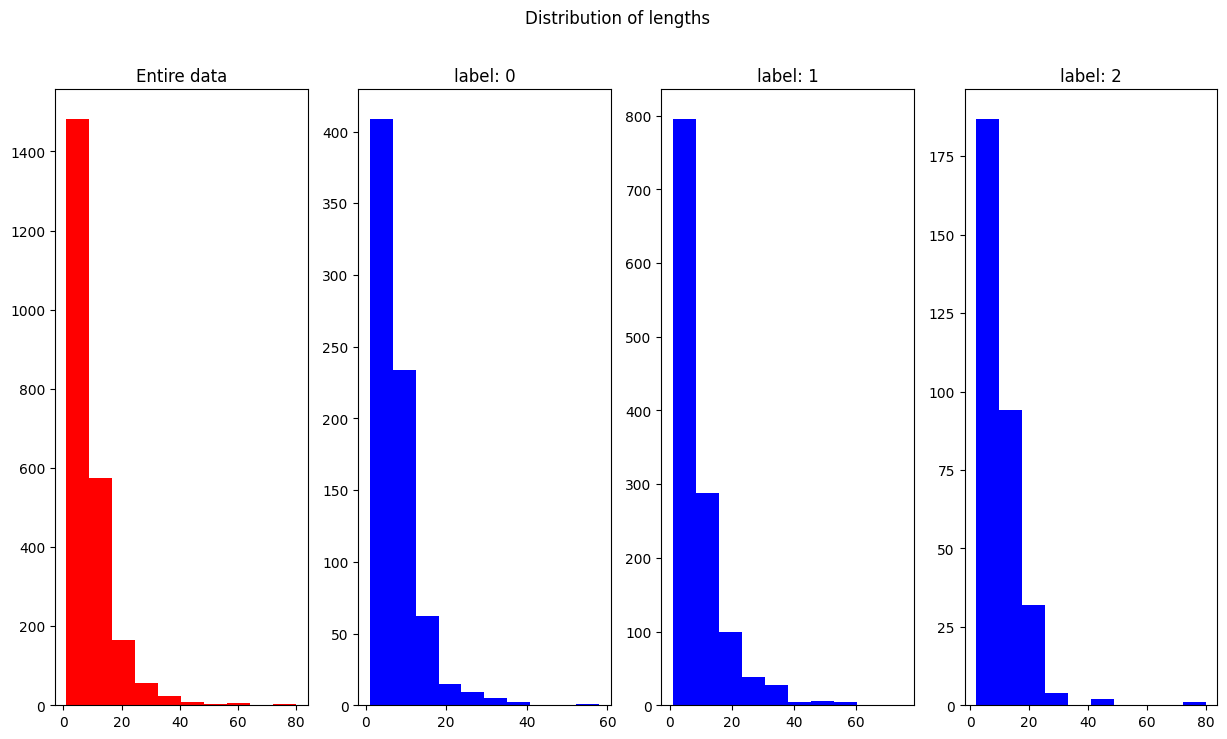

,lengths,mean,stdev
1.0,"[3, 8, 5, 6, 9, 7, 8, 2, 2, 5, 2, 3, 3, 5, 4, ...",8.871937,8.607256
0.0,"[5, 4, 14, 7, 5, 4, 9, 5, 6, 9, 6, 4, 4, 2, 7,...",7.389417,5.771373
2.0,"[12, 8, 7, 7, 6, 4, 6, 9, 9, 3, 18, 21, 5, 13,...",10.284375,7.268932


In [176]:
df_stats = calculate_stats(df)
display_lengths_histograms(df_stats)
df_stats['per_category']

In [177]:
dataset['Comment'] = dataset['Comment'].apply(lambda x: gensim.utils.simple_preprocess(x))

In [178]:
# Cleaning the texts

# cv=CountVectorizer(max_features = 5000)
# X=cv.fit_transform(dataset['Comment']).toarray()
# y=dataset['Label']




X = dataset['Comment']
y = dataset['Label']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [179]:
X_train

1422              [nuno, mendes, và, frimpong, cười, nhẹ]
2209    [cristiano, ronaldo, nếu, là, real, madrid, th...
1837    [việt, nam, chơi, quá, hay, rất, xuất, sắc, nh...
648                                          [đỉnh, thật]
1294       [ủa, nọ, có, video, nói, messi, nhà, giàu, mà]
                              ...                        
1033                                          [cka, nhịn]
1731    [tối, qua, bồ, đào, nha, nhiều, ông, đá, như, ...
763                       [chỉ, có, thể, là, di, dimaria]
835                        [cristiano, ronaldo, lồn, thế]
1653                [quang, hai, se, tim, lai, phong, độ]
Name: Comment, Length: 1857, dtype: object

In [180]:
dataset

,Comment,Label
0,"[garnacho, bảnh, quá]",1.0
1,"[bình, an, đăng, lại, kìa]",0.0
2,"[gọi, garnacho, là, gì]",0.0
3,"[chỉnh, sửa, đẹp, ngầu, âm, thanh, chất, lượng...",0.0
4,"[hâm, mộ, manchester, city, những, vẫn, thích,...",1.0
...,...,...
2317,"[romelu, lukaku, khiến, tôi, bán, xe, rồi]",2.0
2318,"[bỉ, là, đội, yếu, chứ, không, mạnh, như, mầy,...",2.0
2319,"[đồng, tiền, lái, đôi, chân, đá, trượt, bóng, ...",2.0
2320,"[vứt, lịch, thi, đấu, mới, quan, trọng, còn, n...",2.0


In [181]:
X_test

2306          [mẹ, hốc, được, đan, mạch, cũng, gẫy, răng]
563            [ban, đầu, tao, đọc, ra, xà, phòng, ngang]
791                         [dimaria, số, không, ai, dám]
1330                                     [kylian, mbappe]
570                                      [thốn, tận, dốn]
                              ...                        
2167    [nếu, có, công, phượng, thì, chiến, thắng, đỡ,...
1780    [tái, bút, đã, không, coi, bóng, đá, việt, nam...
390     [khi, garnacho, sút, trúng, xà, ngang, vội, lạ...
1585               [palmer, rất, tài, năng, mà, pep, bán]
254          [hú, hét, như, kiểu, đám, thổ, nhĩ, kỳ, phỉ]
Name: Comment, Length: 465, dtype: object

In [182]:
X_train = X_train.apply(lambda x: ' '.join(x))
X_test = X_test.apply(lambda x: ' '.join(x))

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# create a count vectorizer object
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X_train)
count_vect.fit(X_test)

# transform the training and validation data using count vectorizer object
X_data_count = count_vect.transform(X_train)
X_test_count = count_vect.transform(X_test)

In [184]:
type(y_test)

pandas.core.series.Series

In [185]:
#########RandomForestClassifier
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =42)
classifier.fit(X_data_count,y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test_count)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)

In [186]:
from sklearn.metrics import accuracy_score,classification_report
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6666666666666666

In [187]:
cm2

array([[ 91,  57,   2],
       [ 39, 204,   6],
       [ 14,  37,  15]])

In [188]:
# Đánh giá mô hình sử dụng classification_report
report = classification_report(y_test, y_pred)

# In kết quả
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.61      0.62       150
         1.0       0.68      0.82      0.75       249
         2.0       0.65      0.23      0.34        66

    accuracy                           0.67       465
   macro avg       0.66      0.55      0.57       465
weighted avg       0.66      0.67      0.65       465



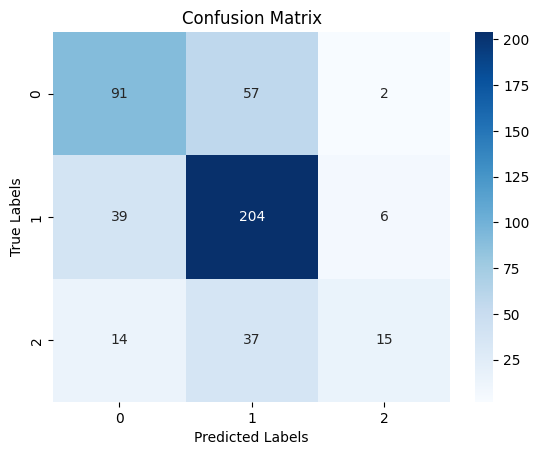

In [189]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
label_list = [0,1,2]
# In confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [190]:
from sklearn.metrics import confusion_matrix

# Giả sử y_pred và y_test là nhãn dự đoán và nhãn thực tế
# y_pred = ...
# y_test = ...

# Lấy confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Lấy False Positives và False Negatives
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
# Lấy indices của False Positives và False Negatives
FP_indices = np.where(FP > 0)[0]
FN_indices = np.where(FN > 0)[0]

# Tìm các mẫu dữ liệu tương ứng với False Positives và False Negatives
FP_samples = df.iloc[FP_indices]
FN_samples = df.iloc[FN_indices]
# In ra các mẫu dữ liệu False Positives
print("False Positives:")
print(FP_samples)

# In ra các mẫu dữ liệu False Negatives
print("\nFalse Negatives:")
print(FN_samples)


False Positives:
                Comment  Label
0     garnacho bảnh quá    1.0
1  bình an đăng lại kìa    0.0
2    gọi garnacho là gì    0.0

False Negatives:
                Comment  Label
0     garnacho bảnh quá    1.0
1  bình an đăng lại kìa    0.0
2    gọi garnacho là gì    0.0


In [191]:
import pandas as pd
import numpy as np

# Giả sử df_test là DataFrame chứa cột 'Content' và 'Label', và y_pred là mảng NumPy
# df_test = ...
# y_pred = ...

# Tạo DataFrame mới từ df_test và y_pred
result_df = pd.DataFrame({'Index':X_test.index,'Content': X_test.values, 'True_Label': y_test.values, 'Predicted_Label': y_pred})

# In ra DataFrame mới
misclassified_samples = result_df[result_df['True_Label'] != result_df['Predicted_Label']]

# In ra các giá trị phân loại sai
print("Các giá trị phân loại sai:")
misclassified_samples

Các giá trị phân loại sai:


,Index,Content,True_Label,Predicted_Label
0,2306,mẹ hốc được đan mạch cũng gẫy răng,2.0,0.0
5,1440,người đi bộ giờ là quá khứ rồi cất poster vào ...,2.0,1.0
18,1038,ủa mình nhớ nhà messi cũng khá giả mà,0.0,1.0
19,69,paul pogba của em đâu,1.0,0.0
20,1103,nhìn mất ông giàu sẵn đúng là sang hơn cái thầ...,1.0,0.0
...,...,...,...,...
455,2145,hlvsang sik mới trận đầu ra mắt mà đã thắng tư...,0.0,1.0
456,1323,this is the work of erik ten he transformed al...,2.0,1.0
461,1780,tái bút đã không coi bóng đá việt nam từ năm n...,2.0,1.0
463,1585,palmer rất tài năng mà pep bán,1.0,0.0


In [192]:
result_df.to_csv('result.csv', index=False)
misclassified_samples.to_csv('phanloaisai.csv', index=False)

In [193]:
import joblib
# Save the trained model to a file
joblib.dump(classifier, '/content/drive/MyDrive/UIT SUBJECT/Big Data/Model/Classification/Machine learning/RandomForest/random_forest_model.pkl')

# Optionally, save the vectorizer as well if needed
joblib.dump(count_vect, '/content/drive/MyDrive/UIT SUBJECT/Big Data/Model/Classification/Machine learning/RandomForest/rf_vectorizer.pkl')

['/content/drive/MyDrive/UIT SUBJECT/Big Data/Model/Classification/Machine learning/RandomForest/rf_vectorizer.pkl']

In [194]:
rf = joblib.load('/content/drive/MyDrive/UIT SUBJECT/Big Data/Model/Classification/Machine learning/RandomForest/random_forest_model.pkl')
vt = joblib.load('/content/drive/MyDrive/UIT SUBJECT/Big Data/Model/Classification/Machine learning/RandomForest/rf_vectorizer.pkl')

In [195]:
import joblib
print(joblib.__version__)


1.4.2


In [198]:
def load_model_and_predict(comment):
    # Chuyển đổi bình luận mới sử dụng CountVectorizer
    comment_count = vt.transform([comment])

    # Dự đoán lớp của bình luận mới
    prediction = rf.predict(comment_count)

    return prediction[0]

In [199]:
comment = 'hay quá'
load_model_and_predict(comment)

1.0